# Handwritten digit classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the Handwritten digit dataset

In [2]:
from keras.datasets import mnist

In [3]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtest.shape

(10000, 28, 28)

In [7]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
ytrain[0]

5

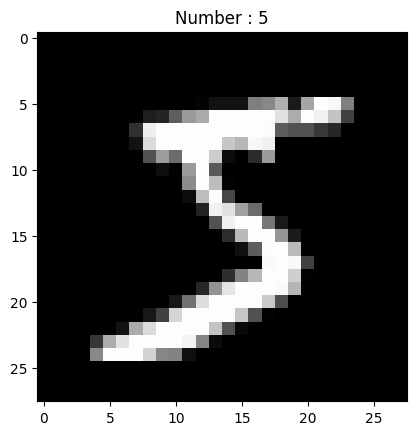

In [11]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap='gray')
plt.title(f'Number : {ytrain[0]}')
plt.show()

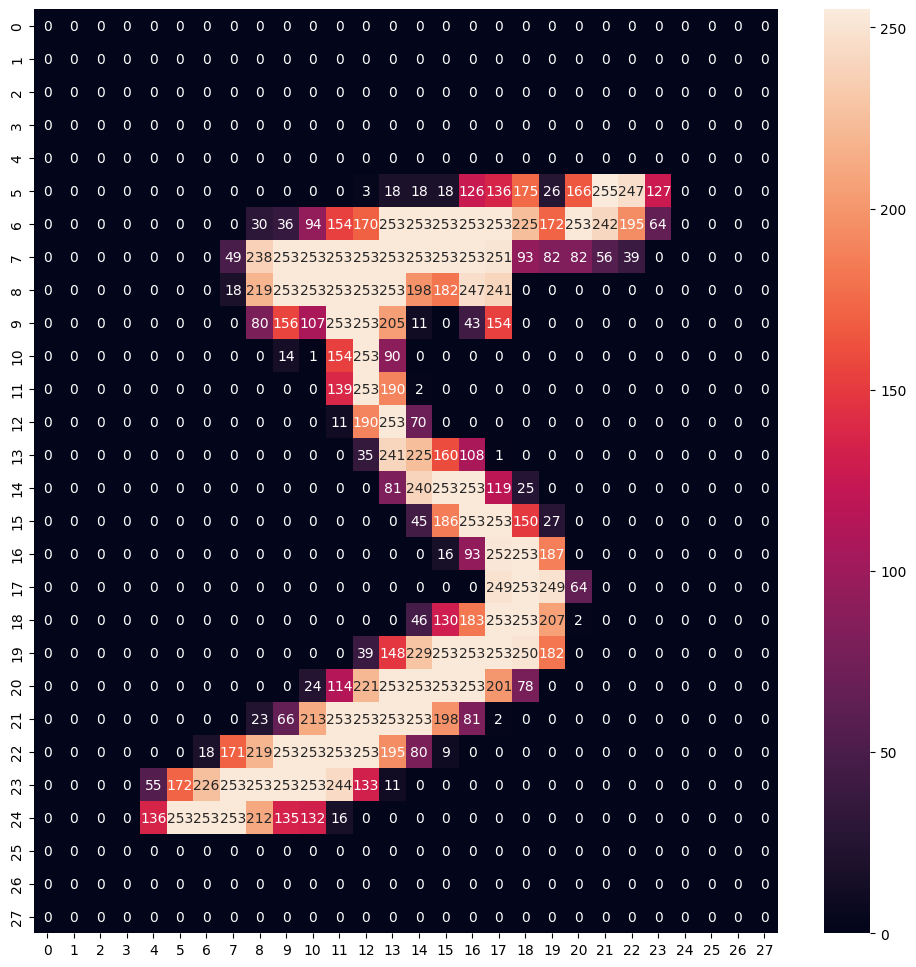

In [16]:
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(xtrain[0], annot=True, fmt='d')
plt.show()

### Seeing top 9 resuts from xtrain

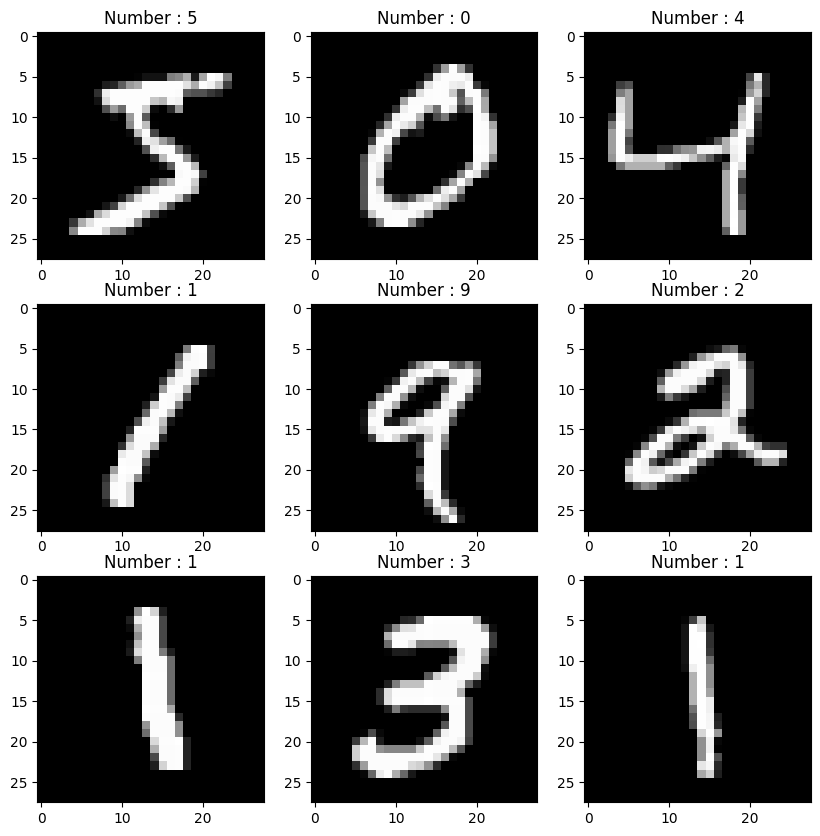

In [14]:
plt.figure(figsize=(10,10))
x = 1
for i in range(9):
    plt.subplot(3,3,x)
    x = x+1
    plt.imshow(xtrain[i], cmap='gray')
    plt.title(f'Number : {ytrain[i]}')
plt.show()

### Preprocessing images

In [19]:
xtrain_scl = xtrain/255 
xtest_scl = xtest/255

In [20]:
import numpy as np 
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Convert ytrain and ytest to categorical

In [21]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [22]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [23]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Building the CNN

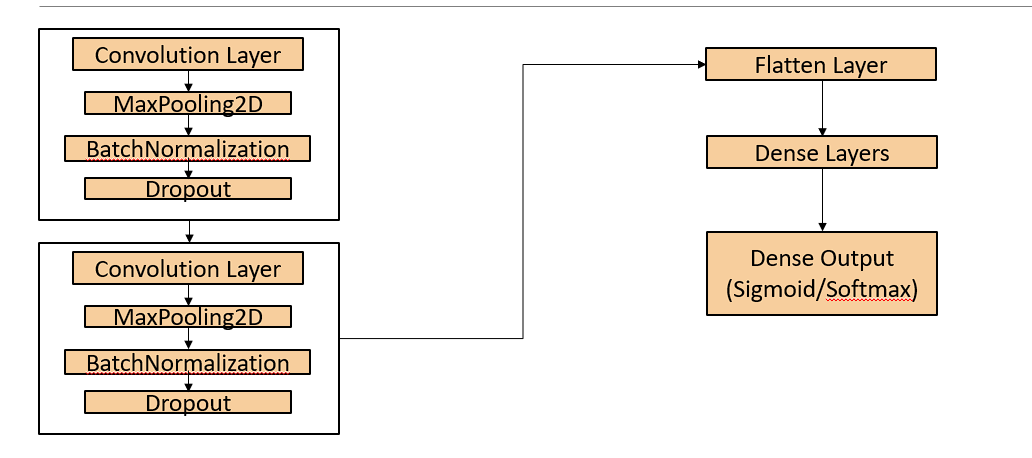

### Batch Normalization Layer will act like standard scaler to each image

In [17]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense 

In [24]:
model = Sequential()

# Create Convolutional Layer 1
model.add(Convolution2D(16, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Create convolution layer 2
model.add(Convolution2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Create a flatten Layer
model.add(Flatten())

# Create a Dense Layer
model.add(Dense(256, activation='relu'))

# Create an output layer 
model.add(Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0

### Compile the model

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Fit the model

In [27]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.2, epochs=5)

Epoch 1/5


1500/1500 [==============================] - 11s 6ms/step - loss: 0.1327 - accuracy: 0.9586 - val_loss: 0.0612 - val_accuracy: 0.9816
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0515 - accuracy: 0.9838 - val_loss: 0.0539 - val_accuracy: 0.9843
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0395 - accuracy: 0.9877 - val_loss: 0.0432 - val_accuracy: 0.9883
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0315 - accuracy: 0.9895 - val_loss: 0.0377 - val_accuracy: 0.9894
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0432 - val_accuracy: 0.9890


### Plot the learning curve

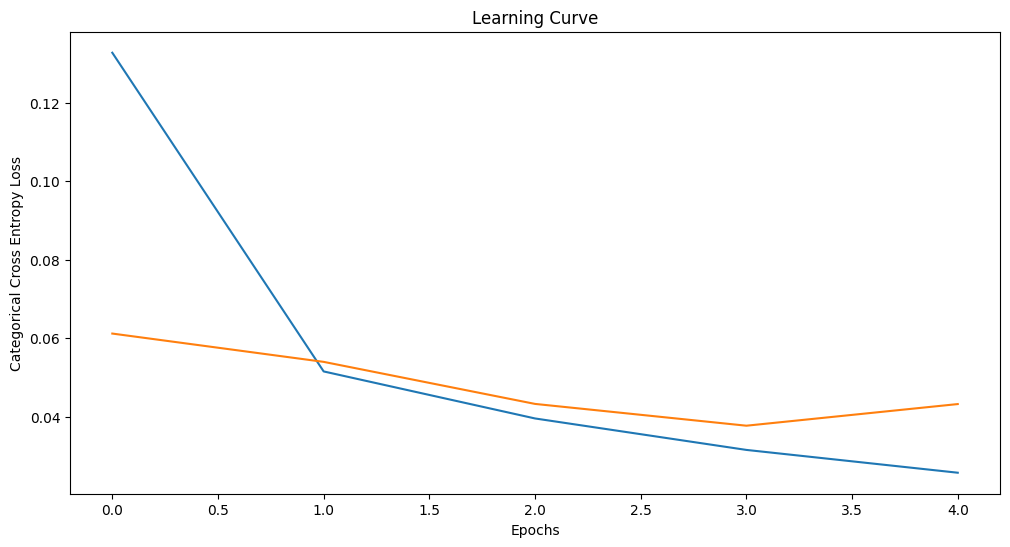

In [28]:
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy Loss')
plt.title('Learning Curve')
plt.show()

### Evaluate model in train and test

In [29]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0204 - accuracy: 0.9940


[0.02038322016596794, 0.9939833283424377]

In [30]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0376 - accuracy: 0.9889


[0.03763978183269501, 0.9889000058174133]

### Predicting results for train and test

In [31]:
yprob_tr = model.predict(xtrain_scl)
yprob_ts = model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [32]:
yprob_tr[0:5]

array([[2.5322218e-09, 5.7635276e-07, 4.0087826e-09, 8.6768322e-02,
        1.6385059e-09, 9.1320062e-01, 2.5816681e-07, 1.8423176e-08,
        2.7694774e-05, 2.4444967e-06],
       [1.0000000e+00, 1.0343543e-11, 4.0534167e-09, 5.9374320e-15,
        6.3823734e-12, 7.3017222e-14, 5.1123794e-10, 3.1594784e-13,
        1.0095127e-12, 1.0663220e-10],
       [1.9708689e-15, 3.1749270e-08, 3.0061095e-08, 4.6517674e-14,
        1.0000000e+00, 1.2349912e-14, 2.3729819e-15, 5.1009513e-11,
        4.7883720e-12, 1.6011106e-11],
       [1.3647868e-09, 1.0000000e+00, 8.8457286e-09, 8.0875346e-16,
        3.1806184e-08, 2.4486455e-14, 2.9294273e-10, 2.2884186e-09,
        4.3965007e-10, 1.0439871e-11],
       [9.1372847e-12, 1.1630851e-09, 1.2984465e-08, 1.5794040e-08,
        3.6197666e-06, 1.7934325e-10, 2.6784022e-13, 9.5176841e-07,
        1.7022356e-06, 9.9999368e-01]], dtype=float32)

### Predicting numbers

In [33]:
ypred_tr = np.argmax(yprob_tr, axis=1)
ypred_ts = np.argmax(yprob_ts, axis=1)

In [34]:
ypred_tr[0:5]

array([5, 0, 4, 1, 9], dtype=int64)

In [35]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [36]:
ypred_ts[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [37]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Create a confusion matrix

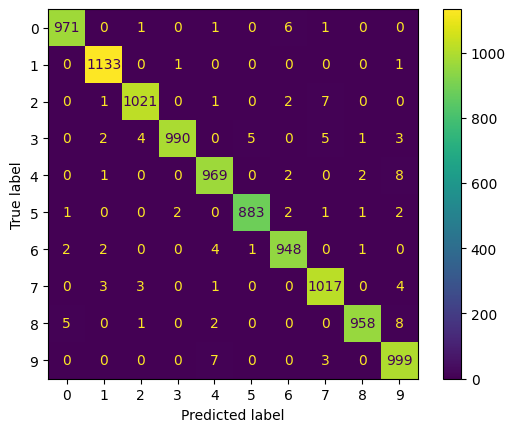

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Print classification report

In [39]:
from sklearn.metrics import classification_report 
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Saving model for future use

In [40]:
model.save('HandwrittenModel.keras')

### Loading the model

In [41]:
from keras.models import load_model

In [42]:
nn = load_model('HandwrittenModel.keras')

In [43]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0